In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
# pandas-num-option!
pd.options.display.max_columns = 50  # None -> No Restrictions
pd.options.display.max_rows = 200    # None -> Be careful with this
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

In [3]:
crime = pd.read_hdf('data/crime.h5', 'crime')

In [4]:
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000,39.746,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.885,39.739,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.021,39.707,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.002,39.770,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.019,39.679,college-view-south-platte,1,0


In [5]:
wd_counts = crime.loc[:, 'REPORTED_DATE'].dt.weekday_name.value_counts(normalize = True)

In [6]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',            
        'Friday', 'Saturday', 'Sunday']

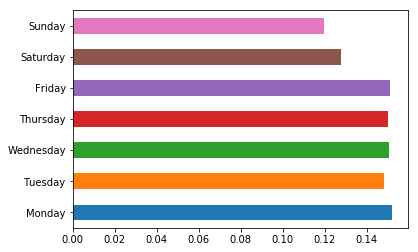

In [7]:
wd_counts.reindex(days).plot(kind = 'barh')

In [8]:
weekday = crime.loc[:, 'REPORTED_DATE'].dt.weekday_name

In [9]:
year = crime.loc[:, 'REPORTED_DATE'].dt.year

In [10]:
crime_wd_y = crime.groupby([year, weekday]).size()

In [11]:
crime_wd_y.head(20)

REPORTED_DATE  REPORTED_DATE
2012           Friday            8549
               Monday            8786
               Saturday          7442
               Sunday            7189
               Thursday          8440
               Tuesday           8191
               Wednesday         8440
2013           Friday           10380
               Monday           10627
               Saturday          8875
               Sunday            8444
               Thursday         10431
               Tuesday          10416
               Wednesday        10354
2014           Friday           12683
               Monday           12813
               Saturday         10950
               Sunday           10278
               Thursday         12309
               Tuesday          12440
dtype: int64

In [12]:
crime_table = crime_wd_y.rename_axis(['Year', 'Weekday']).unstack('Weekday')

In [13]:
crime_table.head(20)

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [14]:
type(crime_table)

pandas.core.frame.DataFrame

In [15]:
crime_table.index

Int64Index([2012, 2013, 2014, 2015, 2016, 2017], dtype='int64', name='Year')

In [16]:
crime_table.loc[2017] = crime_table.loc[2017].div(.748).astype('int')

In [17]:
crime_table

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,14274,14221,11382,10860,14097,14208,14139


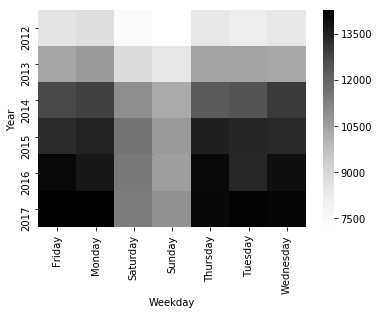

In [18]:
sns.heatmap(crime_table, cmap = 'Greys')

In [25]:
denver_pop = pd.read_csv('data/denver_pop.csv', index_col='Year')

In [26]:
denver_pop

,Population
Year,
2017,705000
2016,693000
2015,680000
2014,662000
2013,647000
2012,634000


In [27]:
den_100k = denver_pop.div(100000).squeeze()

In [28]:
den_100k

Year
2017    7.05
2016    6.93
2015    6.80
2014    6.62
2013    6.47
2012    6.34
Name: Population, dtype: float64

In [31]:
crime_table_population = crime_table.div(den_100k, axis = 'index').astype('int')

In [32]:
crime_table_population

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,1348,1385,1173,1133,1331,1291,1331
2013,1604,1642,1371,1305,1612,1609,1600
2014,1915,1935,1654,1552,1859,1879,1955
2015,1951,1978,1703,1562,1987,1967,1958
2016,2028,1978,1654,1522,2027,1924,2005
2017,2024,2017,1614,1540,1999,2015,2005


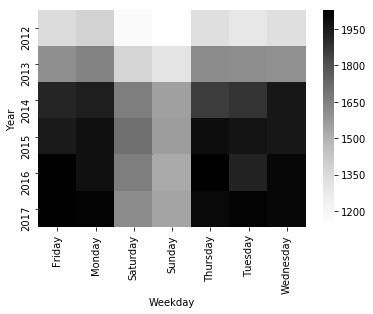

In [33]:
sns.heatmap(crime_table_population, cmap = 'Greys')

In [34]:
crime_sort = pd.read_hdf('data/crime.h5', 'crime').set_index('REPORTED_DATE').sort_index()

In [36]:
common_attrs = set(dir(crime_sort.index)) & set(dir(pd.Timestamp))

In [39]:
crime_sort.index.weekday_name.value_counts()

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [43]:
cr_final = crime_sort.groupby(lambda x: x.weekday_name).agg({'IS_CRIME':sum, 'IS_TRAFFIC':sum})

In [44]:
cr_final

,IS_CRIME,IS_TRAFFIC
Friday,48833,20814
Monday,52158,17895
Saturday,43363,15516
Sunday,42315,12968
Thursday,49470,19845
Tuesday,49658,18755
Wednesday,50054,19508


In [46]:
crime_sort.index.max()

Timestamp('2017-09-29 06:16:00')

In [51]:
crime_sort

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.817,39.797,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.817,39.797,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.972,39.737,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.952,39.740,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998,39.750,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001,39.771,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.877,39.703,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.906,39.772,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.933,39.731,hale,1,0


In [55]:
crime_sort_loc_2017 = crime_sort.loc[:'2017-8']

In [56]:
crime_sort_loc_2017

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.817,39.797,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.817,39.797,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.972,39.737,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.952,39.740,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998,39.750,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001,39.771,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.877,39.703,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.906,39.772,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.933,39.731,hale,1,0


In [57]:
crime_sort_loc_2017.index.max()

Timestamp('2017-08-31 23:52:00')